### A "Thin" Application of Time Series
- Google Trends allows users to see how often a term is searched for.
-  A first step when analyzing a time series is to visualize the data with a plot. We should be able to clearly see a gradual decrease in searches for "diet" throughout the calendar year, hitting a low around the December holidays, followed by a spike in searches around the new year as people make New Year's resolutions to lose weight.
- Like many time series datasets we will be working with, the index of dates are strings and should be converted to a datetime index before plotting.

In [1]:
# Import pandas and plotting modules
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
import numpy as np

In [2]:
diet = pd.read_csv('data/UFO.csv')
diet.head(2)

,Date,Value
0,1941,1
1,1942,2


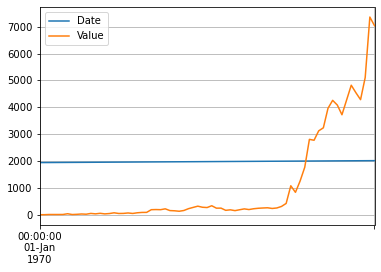

In [3]:
# From previous step
diet.index = pd.to_datetime(diet.index)

# Slice the dataset to keep only 2012
diet2012 = diet['1970']

# Plot 2012 data
diet2012.plot(grid=True)
plt.show()

### Correlation of Stocks and Bonds
- Investors are often interested in the correlation between the returns of two different assets for asset allocation and hedging purposes. 
- We'll try to answer the question of whether stocks are positively or negatively correlated with bonds. Scatter plots are also useful for visualizing the correlation between the two variables.
- Keep in mind that **we should compute the correlations on the percentage changes rather than the levels.**


In [4]:
stock = pd.read_csv('./data/SP500.csv')
stock.head(2)

,observation_date,SP500
0,2007-06-11,1509.12
1,2007-06-12,1493.00


In [5]:
bonds = pd.read_csv('./data/US10Y.csv')
bonds.head(2)

,observation_date,US10Y
0,2007-06-08,5.12
1,2007-06-11,5.14


In [6]:
stocks_and_bonds = pd.merge(stock, bonds, on='observation_date')
stocks_and_bonds.head()

,observation_date,SP500,US10Y
0,2007-06-11,1509.12,5.14
1,2007-06-12,1493.00,5.26
2,2007-06-13,1515.67,5.20
3,2007-06-14,1522.97,5.23
4,2007-06-15,1532.91,5.16


In [7]:
stocks_and_bonds['US10Y'].dropna(axis=0, inplace=True)
stocks_and_bonds['SP500'].dropna(axis=0, inplace=True)
print('na in US10Y ->', stocks_and_bonds['US10Y'].isna().sum())
print('na in SP500 ->', stocks_and_bonds['SP500'].isna().sum())

na in US10Y -> 0
na in SP500 -> 0


- Compute percent changes on the stocks_and_bonds DataFrame using the .pct_change() method and call the new DataFrame returns.
- Compute the correlation of the columns SP500 and US10Y in the returns DataFrame using the .corr() method for Series which has the syntax series1.corr(series2).
- Show a scatter plot of the percentage change in stock and bond yields.

In [8]:
stocks_and_bonds.set_index('observation_date', inplace=True)
stocks_and_bonds.head(2)

,SP500,US10Y
observation_date,,
2007-06-11,1509.12,5.14
2007-06-12,1493.00,5.26


In [9]:
# Compute percent change using pct_change()
returns = stocks_and_bonds.pct_change()

# Compute correlation using corr()
correlation = returns['SP500'].corr(returns['US10Y'])
print("Correlation of stocks and interest rates: ", correlation)

Correlation of stocks and interest rates:  0.40083358828743365


- **Conclusion** : The positive correlation means that when interest rates go down, stock prices go down. For example, during crises like 9/11, investors sold stocks and moved their money to less risky bonds (this is sometimes referred to as a 'flight to quality'). During these periods, stocks drop and interest rates drop as well. Of course, there are times when the opposite relationship holds too.

### Flying Saucers Aren't Correlated to Flying Markets
- Two trending series may show a strong correlation even if they are completely unrelated. This is referred to as "spurious correlation". That's why when we look at the correlation of say, two stocks, we should look at the correlation of their returns and not their levels.
- To illustrate this point, calculate the correlation between the levels of the stock market and the annual sightings of UFOs. Both of those time series have trended up over the last several decades, and the correlation of their levels is very high. Then calculate the correlation of their percent changes. This will be close to zero, since there is no relationship between those two series.

In [10]:
dji = pd.read_csv('data/fin_data/DJI.csv')
dji = dji.rename(columns={'Value':'DJI'})
dji.head(2)

,Date,DJI
0,1941,110.96
1,1942,119.40


In [11]:
ufo = pd.read_csv('data/UFO.csv')
ufo = ufo.rename(columns={'Value':'UFO'})
ufo.head(2)

,Date,UFO
0,1941,1
1,1942,2


In [12]:
levels = pd.merge(dji, ufo, on='Date')
levels.set_index('Date', inplace=True)
levels.head()

,DJI,UFO
Date,,
1941,110.96,1
1942,119.40,2
1943,135.89,9
1944,152.32,9
1945,192.91,9


In [13]:
# Compute correlation of levels
correlation1 = levels['DJI'].corr(levels['UFO'])
print("Correlation of levels: ", correlation1)

# Compute correlation of percent changes
changes = levels.pct_change()
correlation2 = changes['DJI'].corr(changes['UFO'])
print("Correlation of changes: ", correlation2)

Correlation of levels:  0.9399762210726432
Correlation of changes:  0.06026935462405376


- Notice that the correlation on levels is high but the correlation on changes is close to zero.

### Looking at a Regression's R-Squared
- R-squared measures how closely the data fit the regression line, so the R-squared in a simple regression is related to the correlation between the two variables. 
- In particular, the magnitude of the correlation is the square root of the R-squared and the sign of the correlation is the sign of the regression coefficient.
- We will take two series, x and y, compute their correlation, and then regress y on x using the function OLS(y,x) in the statsmodels.api library (note that the dependent, or right-hand side variable y is the first argument). 
- Most linear regressions contain a constant term which is the intercept (the α in the regression yt=α+βxt+ϵt). To include a constant using the function OLS(), we need to add a column of 1's to the right hand side of the regression.


In [14]:
# Import the statsmodels module
import statsmodels.api as sm

stocks_and_bonds_new = stocks_and_bonds.reset_index()
# x = stocks_and_bonds_new['US10Y'].dropna(axis=0)
# y = stocks_and_bonds_new['SP500'].dropna(axis=0)

In [15]:
# Compute correlation of x and y
correlation = stocks_and_bonds['US10Y'].corr(stocks_and_bonds['SP500'])
print("The correlation between x and y is %4.2f" %(correlation))

# Convert the Series x to a DataFrame and name the column x
# dfx = stocks_and_bonds.drop(['SP500', 'observation_date'], axis=1)

# dfx.head(2)

The correlation between x and y is -0.45


In [16]:
# Add a constant to the DataFrame dfx
dfx1 = sm.add_constant(stocks_and_bonds).dropna(axis=0)
print(dfx1.isna().sum())
dfx1.head(2)

const    0
SP500    0
US10Y    0
dtype: int64


,const,SP500,US10Y
observation_date,,,
2007-06-11,1.0,1509.12,5.14
2007-06-12,1.0,1493.00,5.26


In [17]:
stocks_and_bonds_bkp = stocks_and_bonds.copy()
dfx = dfx1[['US10Y', 'const']].dropna(axis=0)
y = dfx1['SP500']
print(dfx.isna().sum(), y.isna().sum())
print(dfx.shape, y.shape)

US10Y    0
const    0
dtype: int64 0
(2498, 2) (2498,)


In [18]:
# Regress y on dfx1
result = sm.OLS(y, dfx).fit()

# Print out the results and look at the relationship between R-squared and the correlation above
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  SP500   R-squared:                       0.206
Model:                            OLS   Adj. R-squared:                  0.206
Method:                 Least Squares   F-statistic:                     647.2
Date:                Wed, 02 Sep 2020   Prob (F-statistic):          3.94e-127
Time:                        22:13:47   Log-Likelihood:                -18393.
No. Observations:                2498   AIC:                         3.679e+04
Df Residuals:                    2496   BIC:                         3.680e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
US10Y       -233.2311      9.168    -25.439      0.0

- **Conclusion** : Notice that the two different methods of computing correlation give the same result. The correlation is about -0.45 and the R-squared is about 0.2

### A Popular Strategy Using Autocorrelation
- One puzzling anomaly with stocks is that investors tend to overreact to news. Following large jumps, either up or down, stock prices tend to reverse. This is described as **mean reversion** in stock prices: prices tend to bounce back, or revert, towards previous levels after large moves, which are observed over time horizons of about a week. A more mathematical way to describe mean reversion is to say that stock returns are **negatively autocorrelated.**
- We'll look at the autocorrelation of weekly returns of MSFT stock from 2012 to 2017. We'll start with a DataFrame MSFT of daily prices. We should use the `.resample()` method to get weekly prices and then compute returns from prices. Use the pandas method `.autocorr()` to get the autocorrelation and show that the autocorrelation is negative.
- Note that the `.autocorr()` method only works on **Series, not DataFrames** (even DataFrames with one column), so we will have to select the column in the DataFrame.

In [19]:
MSFT = pd.read_csv('data/fin_data/MSFT.csv')
MSFT.head(2)

,Date,Adj Close
0,8/6/2012,26.107651
1,8/7/2012,26.377876


In [20]:
MSFT.index = pd.to_datetime(MSFT.Date)
MSFT = MSFT.drop('Date', axis=1)
MSFT.head()

,Adj Close
Date,
2012-08-06,26.107651
2012-08-07,26.377876
2012-08-08,26.438896
2012-08-09,26.587088
2012-08-10,26.517351


In [21]:
# Convert the daily data to weekly data
MSFT = MSFT.resample(rule='W').last().dropna()

MSFT.head()

,Adj Close
Date,
2012-08-12,26.517351
2012-08-19,27.114212
2012-08-26,26.815865
2012-09-02,27.044012
2012-09-09,27.158091


In [22]:
# Compute the percentage change of prices
returns = MSFT.pct_change()

# Compute and print the autocorrelation of returns
autocorrelation = returns['Adj Close'].autocorr()
print("The autocorrelation of weekly returns is %4.2f" %(autocorrelation))

The autocorrelation of weekly returns is -0.16


- Notice how the autocorrelation of returns for MSFT is negative, so the stock is 'mean reverting'

### Are Interest Rates Autocorrelated?
- When we look at daily changes in interest rates, the autocorrelation is close to zero.
- However, if we resample the data and look at **annual changes**, the autocorrelation is **negative**. This implies that while **short term changes in interest rates may be uncorrelated, long term changes in interest rates are negatively autocorrelated**. 
-  A daily move up or down in interest rates is unlikely to tell us anything about interest rates tomorrow, but a move in interest rates over a year can tell us something about where interest rates are going over the next year. And this makes some economic sense: over long horizons, when interest rates go up, the economy tends to slow down, which consequently causes interest rates to fall, and vice versa.
- The DataFrame daily_rates contains daily data of 10-year interest rates from 1962 to 2017.

In [23]:
daily_rates = pd.read_csv('data/US10Y.csv')
daily_rates.head(2)

,observation_date,US10Y
0,2007-06-08,5.12
1,2007-06-11,5.14


In [24]:
daily_rates.index = pd.to_datetime(daily_rates.observation_date)
daily_rates.drop('observation_date', axis=1, inplace=True)
daily_rates.head(3)

,US10Y
observation_date,
2007-06-08,5.12
2007-06-11,5.14
2007-06-12,5.26


In [25]:
print(daily_rates.index.min())
print(daily_rates.index.max())


2007-06-08 00:00:00
2017-06-08 00:00:00


1. Create a new DataFrame, daily_diff, of changes in daily rates using the .diff() method.
2. Compute the autocorrelation of the column 'US10Y' in daily_diff using the .autocorr() method
3. Use the .resample() method with arguments rule='A' to convert to annual frequency and how='last'.
4. Create a new DataFrame, yearly_diff of changes in annual rates and compute the autocorrelation, as above.

In [26]:
# Compute the daily change in interest rates 
daily_diff = daily_rates.diff()

daily_diff.head(3)

,US10Y
observation_date,
2007-06-08,NaN
2007-06-11,0.02
2007-06-12,0.12


In [27]:
# Compute and print the autocorrelation of daily changes
autocorrelation_daily = daily_diff['US10Y'].autocorr()
print("The autocorrelation of daily interest rate changes is %4.2f" %(autocorrelation_daily))

# Convert the daily data to annual data
yearly_rates = daily_rates.resample(rule='A').last()

yearly_rates

The autocorrelation of daily interest rate changes is -0.03


,US10Y
observation_date,
2007-12-31,4.04
2008-12-31,2.25
2009-12-31,3.85
2010-12-31,3.30
2011-12-31,1.89
2012-12-31,1.78
2013-12-31,3.04
2014-12-31,2.17
2015-12-31,2.27


In [28]:
yearly_rates.shape

(11, 1)

In [29]:
# Repeat above for annual data
yearly_diff = yearly_rates.diff()
yearly_diff

,US10Y
observation_date,
2007-12-31,NaN
2008-12-31,-1.79
2009-12-31,1.60
2010-12-31,-0.55
2011-12-31,-1.41
2012-12-31,-0.11
2013-12-31,1.26
2014-12-31,-0.87
2015-12-31,0.10


In [30]:
autocorrelation_yearly = yearly_diff['US10Y'].autocorr()
print("The autocorrelation of annual interest rate changes is %4.2f" %(autocorrelation_yearly))

The autocorrelation of annual interest rate changes is -0.48


- Notice how the daily autocorrelation is small but the annual autocorrelation is large and negative

### Taxing Exercise: Compute the ACF
- We have computed autocorrelations with one lag.Often we are interested in seeing the autocorrelation over many lags. The quarterly earnings for H&R Block (ticker symbol HRB) is plotted , and we can see the extreme cyclicality of its earnings. A vast majority of its earnings occurs in the quarter that taxes are due.
- We will compute the array of autocorrelations for the H&R Block quarterly earnings in the DataFrame HRB. Then, plot the autocorrelation function using the plot_acf module. 
- This plot shows what the autocorrelation function looks like for cyclical earnings data. 
- The ACF at lag=0 is always one, of course.
- for now, suppress the confidence interval by setting alpha=1.

In [31]:
HRB = pd.read_csv('data/fin_data/HRB.csv')
HRB.head(3)

,Quarter,Earnings
0,2007Q1,-0.36
1,2007Q2,-0.38
2,2007Q3,0.07


In [32]:
HRB = HRB.set_index('Quarter')
HRB.head()

,Earnings
Quarter,
2007Q1,-0.36
2007Q2,-0.38
2007Q3,0.07
2007Q4,1.85
2008Q1,-0.34


1. Compute the array of autocorrelations of the quarterly earnings data in DataFrame HRB.
2. Plot the autocorrelation function of the quarterly earnings data in HRB, and pass the argument alpha=1 to suppress the confidence interval.

[ 1.         -0.22122696 -0.39856504 -0.26615093  0.83479804 -0.1901038
 -0.3475634  -0.23140368  0.71995993 -0.15661007 -0.29766783 -0.22097189
  0.61656933 -0.15022869 -0.27922022 -0.22465946  0.5725259  -0.08758288
 -0.24075584 -0.20363054  0.4797058  -0.06091139 -0.20935484 -0.18303202
  0.42481275 -0.03352559 -0.17471087 -0.16384328  0.34341079 -0.01734364
 -0.13820811 -0.12232172  0.28407164 -0.01927656 -0.11757974 -0.10386933
  0.20156485 -0.0120634  -0.07509539 -0.0707104   0.10222029]


C:\Users\Shubham\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning


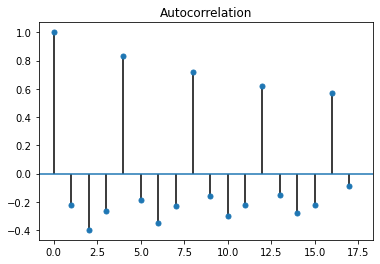

In [33]:
# Import the acf module and the plot_acf module from statsmodels
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf

# Compute the acf array of HRB
acf_array = acf(HRB)
print(acf_array)

# Plot the acf function
plot_acf(HRB, alpha=1)
plt.show()

- Notice the strong positive autocorrelation at lags 4, 8, 12, 16,20, ...

### Are We Confident This Stock is Mean Reverting?
- We saw that the autocorrelation of MSFT's weekly stock returns was -0.16. That autocorrelation seems large, but is it statistically significant? In other words, can we say that there is less than a 5% chance that we would observe such a large negative autocorrelation if the true autocorrelation were really zero? And are there any autocorrelations at other lags that are significantly different from zero?
- Even if the true autocorrelations were zero at all lags, in a finite sample of returns we won't see the estimate of the autocorrelations exactly zero. In fact, the standard deviation of the sample autocorrelation is 1/√N where N is the number of observations, so if N=100, for example, the standard deviation of the ACF is 0.1, and since 95% of a normal curve is between +1.96 and -1.96 standard deviations from the mean, the 95% confidence interval is ±1.96/√N. This approximation only holds when the true autocorrelations are all zero.
- We will compute the actual and approximate confidence interval for the ACF, and compare it to the lag-one autocorrelation of -0.16 
- The weekly returns of Microsoft is pre-loaded in a DataFrame called `returns.`


In [34]:
print(returns.shape)
returns.dropna(inplace=True)
returns.head(3)

(261, 1)


,Adj Close
Date,
2012-08-19,0.022508
2012-08-26,-0.011003
2012-09-02,0.008508


1. Recompute the autocorrelation of weekly returns in the Series 'Adj Close' in the returns DataFrame.
2. Approximate the 95% confidence interval of the estimated autocorrelation. The math function sqrt()can be used.
3. Plot the autocorrelation function of returns using plot_acf that was imported from statsmodels. Set alpha=0.05 for the confidence intervals (that's the default) and lags=20.

The autocorrelation of weekly MSFT returns is -0.16
The approximate confidence interval is +/- 0.12


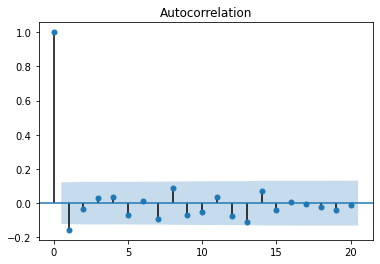

In [35]:
# Import the plot_acf module from statsmodels and sqrt from math
from statsmodels.graphics.tsaplots import plot_acf
from math import sqrt

# Compute and print the autocorrelation of MSFT weekly returns
autocorrelation = returns['Adj Close'].autocorr()
print("The autocorrelation of weekly MSFT returns is %4.2f" %(autocorrelation))

# Find the number of observations by taking the length of the returns DataFrame
nobs = len(returns)

# Compute the approximate confidence interval
conf = 1.96/sqrt(nobs)
print("The approximate confidence interval is +/- %4.2f" %(conf))

# Plot the autocorrelation function with 95% confidence intervals and 20 lags using plot_acf
plot_acf(returns,  alpha=0.05, lags=20)
plt.show()

- Notice that the autocorrelation with lag 1 is significantly negative, but none of the other lags are significantly different from zero

### Can't Forecast White Noise
- A white noise time series is simply a sequence of uncorrelated random variables that are identically distributed. Stock returns are often modeled as white noise. 
- Unfortunately, for white noise, we cannot forecast future observations based on the past - autocorrelations at all lags are zero.
- We will generate a white noise series and plot the autocorrelation function to show that it is zero for all lags. We can use `np.random.normal()` to generate random returns. For a Gaussian white noise process, the mean and standard deviation describe the entire process.


1. Generate 1000 random normal returns using np.random.normal() with mean 2% (0.02) and standard deviation 5% (0.05), where the argument for the mean is loc and the argument for the standard deviation is scale
2. Plot the autocorrelation function using plot_acf with lags=20.

The mean is 0.020 and the standard deviation is 0.048


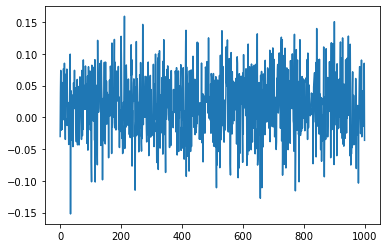

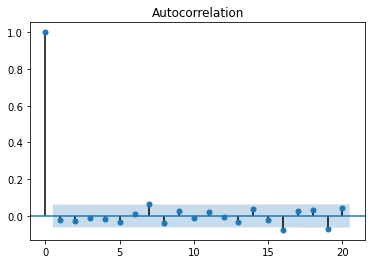

In [36]:
# Simulate white noise returns
returns = np.random.normal(loc=0.02, scale=0.05, size=1000)

# Print out the mean and standard deviation of returns
mean = np.mean(returns)
std = np.std(returns)
print("The mean is %5.3f and the standard deviation is %5.3f" %(mean,std))

# Plot returns series
plt.plot(returns)
plt.show()

# Plot autocorrelation function of white noise returns
plot_acf(returns, lags=20)
plt.show()

- **Conclusion:** Notice that for a white noise time series, all the autocorrelations are close to zero, so the past will not help you forecast the future.

### Generate a Random Walk
- Whereas stock returns are often modeled as white noise, stock prices closely follow a random walk. In other words, today's price is yesterday's price plus some random noise. 
- We will simulate the price of a stock over time that has a starting price of 100 and every day goes up or down by a random amount. Then, plot the simulated stock price. 
-  If we "Run Code" multiple times, we'll see several realizations.

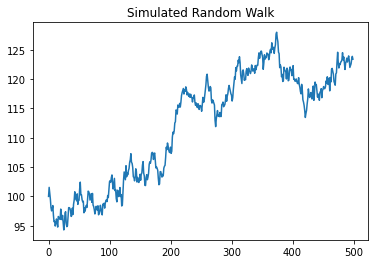

In [37]:
# Generate 500 random steps with mean=0 and standard deviation=1
steps = np.random.normal(loc=0, scale=1, size=500)

# Set first element to 0 so that the first price will be the starting stock price
steps[0]=0

# Simulate stock prices, P with a starting price of 100
P = 100 + np.cumsum(steps)

# Plot the simulated stock prices
plt.plot(P)
plt.title("Simulated Random Walk")
plt.show()

### Get the Drift
- We simulated stock prices that follow a random walk. We will extend this in two ways 


1. We will look at a random walk with a drift. Many time series, like stock prices, are random walks but tend to drift up over time.
2. The noise in the random walk was additive: random, normal changes in price were added to the last price. However, when adding noise, we could theoretically get negative prices. Now we will make the noise multiplicative: we will add one to the random, normal changes to get a total return, and multiply that by the last price.

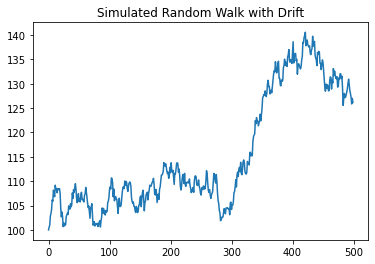

In [38]:
# Generate 500 random steps
steps = np.random.normal(loc=.001, scale=0.01, size=500) + 1

# Set first element to 1
steps[0]=1

# Simulate the stock price, P, by taking the cumulative product
P = 100 * np.cumprod(steps)

# Plot the simulated stock prices
plt.plot(P)
plt.title("Simulated Random Walk with Drift")
plt.show()

### Are Stock Prices a Random Walk? - ADF
- Most stock prices follow a random walk (perhaps with a drift). We will look at a time series of Amazon stock prices, loaded in the DataFrame `AMZN`, and run the **'Augmented Dickey-Fuller Test'** from the statsmodels library to show that it does indeed follow a random walk.
- With the ADF test, the "null hypothesis" (the hypothesis that we either reject or fail to reject) is that the series follows a random walk. Therefore, a low p-value (say less than 5%) means we can reject the null hypothesis that the series is a random walk.

In [39]:
AMZN = pd.read_csv('data/fin_data/AMZN.csv')
AMZN.head(3)

,Date,Adj Close
0,5/15/1997,1.958333
1,5/16/1997,1.729167
2,5/19/1997,1.708333


In [40]:
AMZN.index = pd.to_datetime(AMZN.Date)
AMZN = AMZN.drop('Date', axis=1)
AMZN.head(3)

,Adj Close
Date,
1997-05-15,1.958333
1997-05-16,1.729167
1997-05-19,1.708333


1. Run the Augmented Dickey-Fuller test on the series of closing stock prices, which is the column 'Adj Close' in the AMZN DataFrame.
2. Print out the entire output, which includes the test statistic, the p-values, and the critical values for tests with 1%, 10%, and 5% levels.
3. Print out just the p-value of the test (results[0] is the test statistic, and results[1] is the p-value).


In [41]:
# Import the adfuller module from statsmodels
from statsmodels.tsa.stattools import adfuller

# Run the ADF test on the price series and print out the results
results = adfuller(AMZN['Adj Close'])
print(results)

# Just print out the p-value
print('The p-value of the test on prices is: ' + str(results[1]))

(4.025168525770741, 1.0, 33, 5054, {'1%': -3.4316445438146865, '5%': -2.862112049726916, '10%': -2.5670745025321304}, 30308.64216426981)
The p-value of the test on prices is: 1.0


- According to this test, we cannot reject the hypothesis that Amazon prices follow a random walk. 

### How About Stock Returns?
- We will do the same thing for Amazon returns **(percent change in prices)** and show that the returns do not follow a random walk.

In [42]:
# Import the adfuller module from statsmodels
from statsmodels.tsa.stattools import adfuller

# Create a DataFrame of AMZN returns
AMZN_ret = AMZN.pct_change()

# Eliminate the NaN in the first row of returns
AMZN_ret = AMZN_ret.dropna()

# Run the ADF test on the return series and print out the p-value
results = adfuller(AMZN_ret['Adj Close'])
print('The p-value of the test on returns is: ' + str(results[1]))

The p-value of the test on returns is: 2.5655898083476245e-22


- The p-value is extremely small, so we can easily reject the hypothesis that returns are a random walk at all levels of significance.

#### Seasonal Adjustment During Tax Season
- Many time series exhibit strong seasonal behavior. The procedure for removing the seasonal component of a time series is called seasonal adjustment. 
- For example, most economic data published by the government is seasonally adjusted.
- by taking first differences of a random walk, we get a stationary white noise process. For seasonal adjustments, instead of taking first differences, we can take differences with a lag corresponding to the periodicity.

In [43]:
from statsmodels.graphics.tsaplots import plot_acf
import numpy as np

HRB = pd.read_csv('./data/fin_data/HRB.csv')
HRB.head(3)

,Quarter,Earnings
0,2007Q1,-0.36
1,2007Q2,-0.38
2,2007Q3,0.07


In [44]:
HRB = HRB.set_index('Quarter')
HRB.head(3)

,Earnings
Quarter,
2007Q1,-0.36
2007Q2,-0.38
2007Q3,0.07


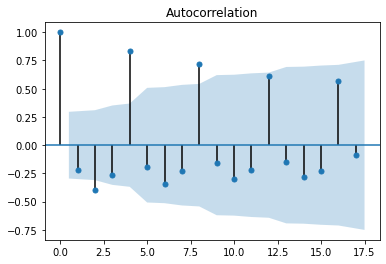

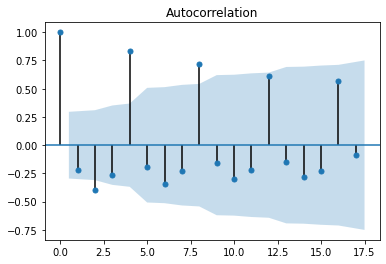

In [45]:
plot_acf(HRB)

- Look at the ACF of H&R Block's quarterly earnings,there is a clear seasonal component. The autocorrelation is high for lags 4,8,12,16,… because of the spike in earnings every four quarters during tax season.
- Apply a seasonal adjustment by taking the fourth difference (four represents the periodicity of the series). Then compute the autocorrelation of the transformed series.


In [46]:
# Seasonally adjust quarterly earnings
HRBsa = HRB.diff(4)

# Print the first 10 rows of the seasonally adjusted series
print(HRBsa.head(10))

         Earnings
Quarter          
2007Q1        NaN
2007Q2        NaN
2007Q3        NaN
2007Q4        NaN
2008Q1       0.02
2008Q2      -0.04
2008Q3      -0.05
2008Q4       0.26
2009Q1      -0.05
2009Q2       0.02


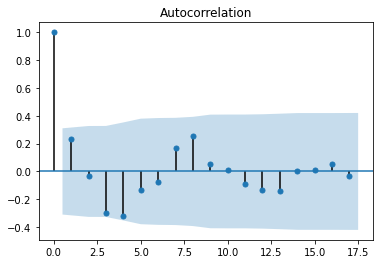

In [47]:
# Drop the NaN data in the first four rows
HRBsa = HRBsa.dropna()

# Plot the autocorrelation function of the seasonally adjusted series
plot_acf(HRBsa)
plt.show()

- By seasonally adjusting the series, we eliminated the seasonal pattern in the autocorrelation function

### Simulate AR(1) Time Series
- We will simulate and plot a few AR(1) time series, each with a different parameter, ϕ, using the `arima_process` module in `statsmodels`.We will look at an AR(1) model with a large positive ϕ and a large negative ϕ.
- There are a few conventions when using the `arima_process` module that require some explanation. First, these routines were made very generally to handle both AR and MA models.
- Second, when inputting the coefficients, we must include the zero-lag coefficient of 1, and the sign of the other coefficients is opposite what we have been using (to be consistent with the time series literature in signal processing). 
- For example, for an AR(1) process with `ϕ=0.9`, the array representing the AR parameters would be `ar = np.array([1, -0.9])`
- Plot the simulated AR processes:
- Let ar1 represent an array of the AR parameters [1, −ϕ] as explained above. For now, the MA parameter array, ma1, will contain just the lag-zero coefficient of one.
- With parameters ar1 and ma1, create an instance of the class ArmaProcess(ar,ma) called AR_object1.
- Simulate 1000 data points from the object we just created, `AR_object1`, using the method `.generate_sample()`. Plot the simulated data in a subplot.

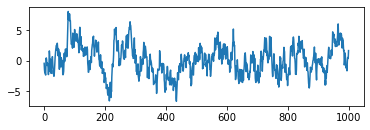

In [48]:
# import the module for simulating data
from statsmodels.tsa.arima_process import ArmaProcess

# Plot 1: AR parameter = +0.9
plt.subplot(2,1,1)
ar1 = np.array([1, -0.9])
ma1 = np.array([1])
AR_object1 = ArmaProcess(ar1, ma1)

simulated_data_1 = AR_object1.generate_sample(nsample=1000)
plt.plot(simulated_data_1)

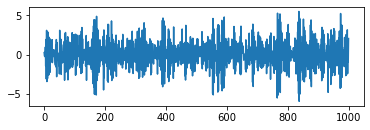

In [49]:

# Plot 2: AR parameter = -0.9
plt.subplot(2,1,2)
ar2 = np.array([1, 0.9])
ma2 = np.array([1])
AR_object2 = ArmaProcess(ar2, ma2)
simulated_data_2 = AR_object2.generate_sample(nsample=1000)
plt.plot(simulated_data_2)
plt.show()

- The two AR parameters produce very different looking time series plots,

### Compare the ACF for Several AR Time Series
- The autocorrelation function decays exponentially for an AR time series at a rate of the AR parameter. For example, if the AR parameter, ϕ=+0.9, the first-lag autocorrelation will be 0.9, the second-lag will be (0.9)2=0.81, the third-lag will be (0.9)3=0.729, etc.
- A smaller AR parameter will have a steeper decay, and for a negative AR parameter, say -0.9, the decay will flip signs, so the first-lag autocorrelation will be -0.9, the second-lag will be (−0.9)2=0.81, the third-lag will be (−0.9)3=−0.729, etc.
- The object simulated_data_1 is the simulated time series with an AR parameter of +0.9, simulated_data_2 is for an AR parameter of -0.9, and simulated_data_3 is for an AR parameter of 0.3

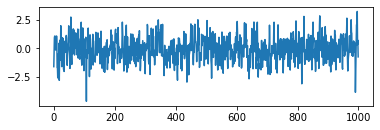

In [50]:
# Plot 2: AR parameter = 0.3
plt.subplot(2,1,2)
ar3 = np.array([1, -0.3])
ma3 = np.array([1])
AR_object2 = ArmaProcess(ar3, ma3)
simulated_data_3 = AR_object2.generate_sample(nsample=1000)
plt.plot(simulated_data_3)
plt.show()

- Compute the autocorrelation function for each of the three simulated datasets using the plot_acf function with 20 lags (and suppress the confidence intervals by setting alpha=1).

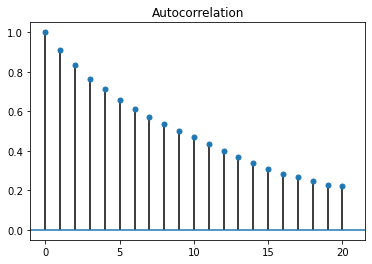

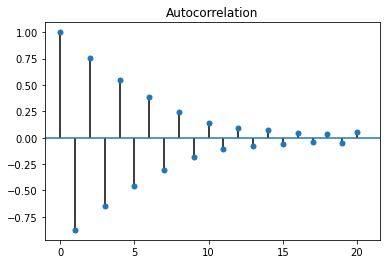

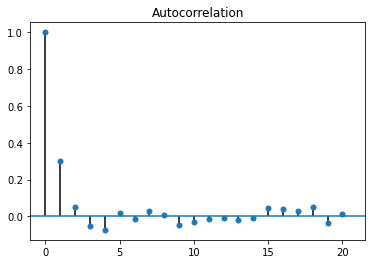

In [51]:
# Plot 1: AR parameter = +0.9
plot_acf(simulated_data_1, alpha=1, lags=20)
plt.show()

# Plot 2: AR parameter = -0.9
plot_acf(simulated_data_2, alpha=1, lags=20)
plt.show()

# Plot 3: AR parameter = +0.3
plot_acf(simulated_data_3, alpha=1, lags=20)
plt.show()

### Estimating an AR Model
- We will estimate the AR(1) parameter, ϕ, of one of the simulated series that we generated. Since the parameters are known for a simulated series, it is a good way to understand the estimation routines before applying it to real data.
- For `simulated_data_1` with a true ϕ of 0.9, we will print out the estimate of ϕ. In addition, we will also print out the entire output that is produced when we fit a time series, so we can get an idea of what other tests and summary statistics are available in statsmodels.

In [52]:
# Import the ARMA module from statsmodels
from statsmodels.tsa.arima_model import ARMA

# Fit an AR(1) model to the first simulated data
mod = ARMA(simulated_data_1, order=(1,0))
res = mod.fit()

# Print out summary information on the fit
print(res.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 1000
Model:                     ARMA(1, 0)   Log Likelihood               -1408.447
Method:                       css-mle   S.D. of innovations              0.989
Date:                Wed, 02 Sep 2020   AIC                           2822.894
Time:                        22:13:52   BIC                           2837.617
Sample:                             0   HQIC                          2828.490
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1652      0.345      0.479      0.632      -0.510       0.841
ar.L1.y        0.9102      0.013     70.093      0.000       0.885       0.936
                                    Roots           

In [53]:
# Print out the estimate for the constant and for phi
print("When the true phi=0.9, the estimate of phi (and the constant) are:")
print(res.params)

When the true phi=0.9, the estimate of phi (and the constant) are:
[0.16519141 0.91017414]


- Conclusion : Notice how close the estimated parameter is to the true parameter.

### Forecasting with an AR Model
- In addition to estimating the parameters of a model, we can also do forecasting, both in-sample and out-of-sample using statsmodels.
- The in-sample is a forecast of the next data point using the data up to that point, and the out-of-sample forecasts any number of data points in the future.
- **These forecasts can be made using either the `predict()` method if we want the forecasts in the form of a series of data, or using the `plot_predict()` method if we want a plot of the forecasted data. We supply the starting point for forecasting and the ending point, which can be any number of data points after the data set ends.**
- For the simulated series simulated_data_1 with ϕ=0.9, we will plot in-sample and out-of-sample forecasts.

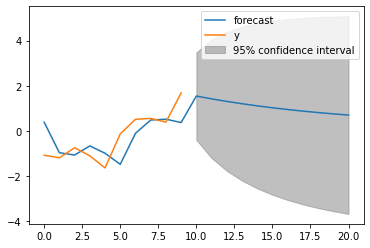

In [54]:
from statsmodels.tsa.arima_model import ARMA

# forecast the first AR(1) model
mod = ARMA(simulated_data_1, order=(1,0))
res = mod.fit()
res.plot_predict(start=990, end=1010)
plt.show()

In [55]:
res.predict(start=990, end=1010)

array([ 0.38878082, -0.96229326, -1.06456992, -0.660375  , -0.98552806,
       -1.47431706, -0.10341844,  0.48477964,  0.52171716,  0.37231177,
        1.54521766,  1.42125561,  1.30842856,  1.2057363 ,  1.11226845,
        1.02719644,  0.9497661 ,  0.879291  ,  0.81514639,  0.75676362,
        0.70362514])

- Conclusion : Notice how, when phi is high like here(0.9), the forecast gradually moves to the long term mean of zero, but if phi were low, it would move much quicker to the long term mean.

#### Simulating AR(1) time series with low phi 0.3

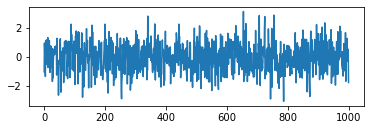

In [56]:
# Plot 1: AR parameter = +0.1
plt.subplot(2,1,1)
ar_new = np.array([1, -0.1])
ma_new = np.array([1])
AR_object_new = ArmaProcess(ar_new, ma_new)
simulated_data_0_3 = AR_object_new.generate_sample(nsample=1000)
plt.plot(simulated_data_0_3)
plt.show()

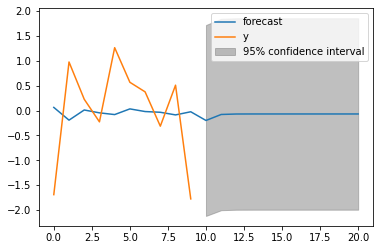

In [57]:
# forecast the first AR(1) model with phi=+0.3
mod = ARMA(simulated_data_0_3, order=(1,0))
res = mod.fit()
res.plot_predict(start=990, end=1010)
plt.show()

###  Forecast Interest Rates
- use the forecasting techniques and apply it to real data rather than simulated data. the annual data of 10-year interest rates going back 56 years
-  Being able to forecast interest rates is of enormous importance, not only for bond investors but also for individuals like new homeowners who must decide between fixed and floating rate mortgages.
- there is some mean reversion in interest rates over long horizons. In other words, when interest rates are high, they tend to drop and when they are low, they tend to rise over time.
- Currently they are below long-term rates, so they are expected to rise, **but an AR model attempts to quantify how much they are expected to rise.**

In [58]:
interest_rate_data = pd.read_excel('./data/interest_rate_data.xlsx')
interest_rate_data.head(3)

,DATE,US10Y
0,1962-12-31,3.85
1,1963-12-31,4.14
2,1964-12-31,4.21


In [59]:
interest_rate_data.set_index('DATE', inplace=True)
interest_rate_data = interest_rate_data.dropna()
interest_rate_data.head(3)

,US10Y
DATE,
1962-12-31,3.85
1963-12-31,4.14
1964-12-31,4.21


C:\Users\Shubham\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  % freq, ValueWarning)


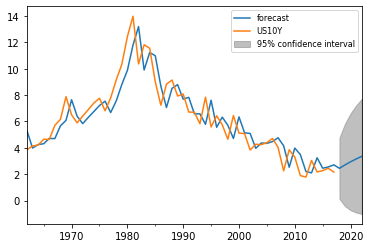

In [60]:
from statsmodels.tsa.arima_model import ARMA

# forecast interest rates using an AR(1) model
mod = ARMA(interest_rate_data, order=(1,0))
res = mod.fit()

# plot the original series and the forecasted series
res.plot_predict(start=0, end='2022')
plt.legend(fontsize=8)
plt.show()

- Conclusion : According to an AR(1) model, 10-year interest rates are forecasted to rise from 2.16%, towards the end of 2017 to 3.35% in five years.

### Compare AR Model with Random Walk
- Sometimes it is difficult to distinguish between a time series that is slightly mean reverting and a time series that does not mean revert at all, like a random walk. 
- We will compare the ACF for the slightly mean-reverting interest rate series with a simulated random walk with the same number of observations.
- notice when plotting the autocorrelation of these two series side-by-side that they look very similar.

In [61]:
simulated_data = np.array([5.        , 4.77522278, 5.60354317, 5.96406402, 5.97965372,
       6.02771876, 5.5470751 , 5.19867084, 5.01867859, 5.50452928,
       5.89293842, 4.6220103 , 5.06137835, 5.33377592, 5.09333293,
       5.37389022, 4.9657092 , 5.57339283, 5.48431854, 4.68588587,
       5.25218625, 4.34800798, 4.34544412, 4.72362568, 4.12582912,
       3.54622069, 3.43999885, 3.77116252, 3.81727011, 4.35256176,
       4.13664247, 3.8745768 , 4.01630403, 3.71276593, 3.55672457,
       3.07062647, 3.45264414, 3.28123729, 3.39193866, 3.02947806,
       3.88707349, 4.28776889, 3.47360734, 3.33260631, 3.09729579,
       2.94652178, 3.50079273, 3.61020341, 4.23021143, 3.94289347,
       3.58422345, 3.18253962, 3.26132564, 3.19777388, 3.43527681,
       3.37204482])

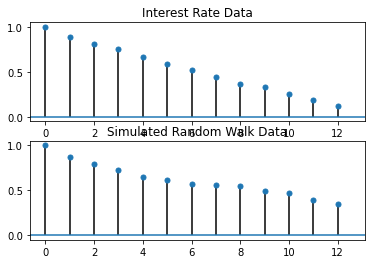

In [62]:
# Import the plot_acf module from statsmodels
from statsmodels.graphics.tsaplots import plot_acf

# Plot the interest rate series and the simulated random walk series side-by-side
fig, axes = plt.subplots(2,1)

# Plot the autocorrelation of the interest rate series in the top plot
fig = plot_acf(interest_rate_data, alpha=1, lags=12, ax=axes[0])

# Plot the autocorrelation of the simulated random walk series in the bottom plot
fig = plot_acf(simulated_data, alpha=1, lags=12, ax=axes[1])

# Label axes
axes[0].set_title("Interest Rate Data")
axes[1].set_title("Simulated Random Walk Data")
plt.show()

- Notice the Autocorrelation functions look very similar for the two series.

### Estimate Order of Model: PACF
- One useful tool to identify the order of an AR model is to look at the **Partial Autocorrelation Function (PACF).** 
- simulate two time series, an AR(1) and an AR(2), and calculate the sample PACF for each. We will notice that for an AR(1), the PACF should have a significant lag-1 value, and roughly zeros after that. 
- for an AR(2), the sample PACF should have significant lag-1 and lag-2 values, and zeros after that.


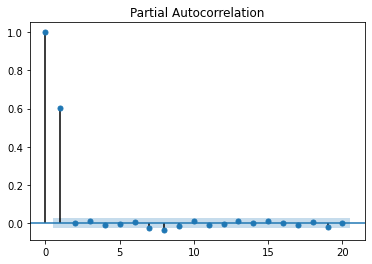

In [63]:
from statsmodels.graphics.tsaplots import plot_pacf

# Simulate AR(1) with phi=+0.6
ma = np.array([1])
ar = np.array([1, -0.6])

AR_object = ArmaProcess(ar, ma)
simulated_data_1 = AR_object.generate_sample(nsample=5000)
# Plot PACF for AR(1)
plot_pacf(simulated_data_1, lags=20)
plt.show()

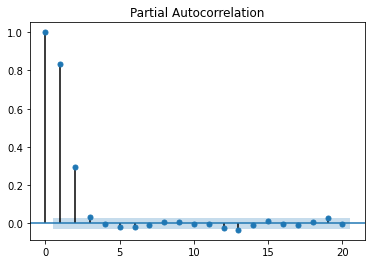

In [64]:
# Simulate AR(2) with phi1=+0.6, phi2=+0.3
ma = np.array([1])
ar = np.array([1, -0.6, -0.3])
AR_object = ArmaProcess(ar, ma)
simulated_data_2 = AR_object.generate_sample(nsample=5000)

# Plot PACF for AR(2)
plot_pacf(simulated_data_2, lags=20)
plt.show()

- Notice that the number of significant lags for the PACF indicate the order of the AR model

### Estimate Order of Model: Information Criteria
- Another tool to identify the order of a model is to look at the Akaike Information Criterion (AIC) and the Bayesian Information Criterion (BIC). 
- These measures compute the goodness of fit with the estimated parameters, but apply a penalty function on the number of parameters in the model. 
- *compute the BIC as we vary the order, p, in an AR(p) from 0 to 6.*

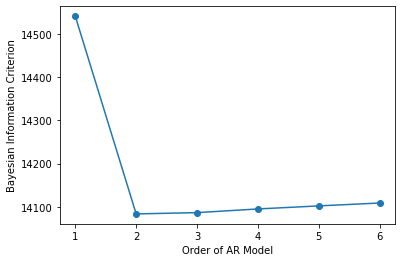

In [65]:
# Import the module for estimating an ARMA model
from statsmodels.tsa.arima_model import ARMA

# Fit the data to an AR(p) for p = 0,...,6 , and save the BIC
BIC = np.zeros(7)
for p in range(7):
    mod = ARMA(simulated_data_2, order=(p,0))
    res = mod.fit()
    # save BIC for AR(p)
    BIC[p] = res.bic
    
#plot the BIC as a function of p
plt.plot(range(1,7), BIC[1:7], marker='o')
plt.xlabel('Order of AR Model')
plt.ylabel('Bayesian Information Criterion')
plt.show()

- For an AR(2), the BIC achieves its minimum at p=2, which is what we expect.

### Simulate MA(1) Time Series
- We will simulate and plot a few MA(1) time series, each with a different parameter, θ, using the arima_process module in statsmodels
- We will look at an MA(1) model with a large positive θ and a large negative θ.
- when inputting the coefficients, we must include the zero-lag coefficient of 1, but unlike the AR models, the sign of the MA coefficients is what we would expect.
- For example, for an MA(1) process with θ=−0.9, the array representing the MA parameters would be `ma = np.array([1, -0.9])`

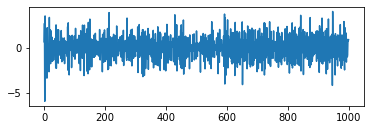

In [66]:
# Plot 1: MA parameter = -0.9
plt.subplot(2,1,1)
ar1 = np.array([1])
ma1 = np.array([1, -0.9])
MA_object1 = ArmaProcess(ar1, ma1)
simulated_data_1 = MA_object1.generate_sample(nsample=1000)
plt.plot(simulated_data_1)

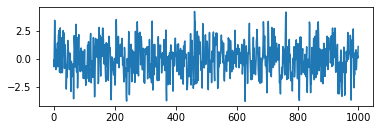

In [67]:
# Plot 2: MA parameter = +0.9
plt.subplot(2,1,2)
ar2 = np.array([1])
ma2 = np.array([1, 0.9])
MA_object2 = ArmaProcess(ar2, ma2)
simulated_data_2 = MA_object2.generate_sample(nsample=1000)
plt.plot(simulated_data_2)

- The two MA parameters produce different time series plots, 

### Compute the ACF for Several MA Time Series
- **`Unlike an AR(1), an MA(1) model has no autocorrelation beyond lag 1, an MA(2) model has no autocorrelation beyond lag 2, etc.`**
- **`The lag-1 autocorrelation for an MA(1) model is not θ, but rather θ/(1+θ^2)`**
- For example, if the MA parameter, θ, is = +0.9, the first-lag autocorrelation will be **`0.9/(1+(0.9)2)=0.497`**, and the autocorrelation at all other lags will be zero
- If the MA parameter, θ, is -0.9, the first-lag autocorrelation will be **`−0.9/(1+(−0.9)2)=−0.497`**


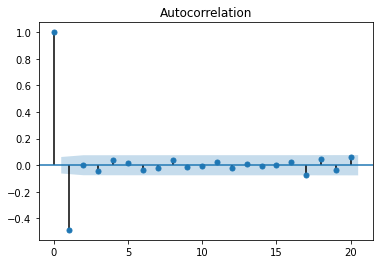

In [68]:
# Plot 1: MA parameter = -0.9
plot_acf(simulated_data_1, lags=20)
plt.show()

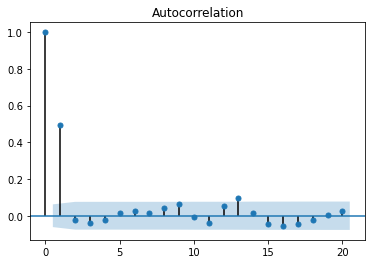

In [69]:
# Plot 2: MA parameter = 0.9
plot_acf(simulated_data_2, lags=20)
plt.show()

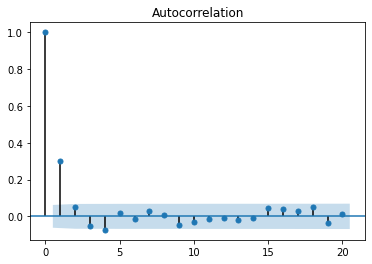

In [70]:
# Plot 3: MA parameter = -0.3
plot_acf(simulated_data_3, lags=20)
plt.show()

### Estimating an MA Model
- We will estimate the MA(1) parameter, θ, of one of the simulated series.Since the parameters are known for a simulated series, it is a good way to understand the estimation routines before applying it to real data.
- For simulated_data_1 with a true θ of -0.9, we will print out the estimate of θ. In addition, we will also print out the entire output that is produced when you fit a time series, so we can get an idea of what other tests and summary statistics are available in statsmodels.

In [71]:
# Fit an MA(1) model to the first simulated data
mod = ARMA(simulated_data_1, order=(0,1))
res = mod.fit()

# Print out summary information on the fit
print(res.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 1000
Model:                     ARMA(0, 1)   Log Likelihood               -1431.906
Method:                       css-mle   S.D. of innovations              1.012
Date:                Wed, 02 Sep 2020   AIC                           2869.812
Time:                        22:13:58   BIC                           2884.535
Sample:                             0   HQIC                          2875.408
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0010      0.003      0.302      0.762      -0.006       0.008
ma.L1.y       -0.8971      0.014    -62.512      0.000      -0.925      -0.869
                                    Roots           

In [72]:
# Print out the estimate for the constant and for theta
print("When the true theta=-0.9, the estimate of theta (and the constant) are:")
print(res.params)

When the true theta=-0.9, the estimate of theta (and the constant) are:
[ 0.00100428 -0.89710188]


### Forecasting with MA Model
- will use MA models to forecast in-sample and out-of-sample data using statsmodels.
- For the simulated series simulated_data_1 with θ=−0.9, we will plot in-sample and out-of-sample forecasts. One big difference we will see between out-of-sample forecasts with an MA(1) model and an AR(1) model is that the MA(1) forecasts more than one period in the future are simply the mean of the sample.

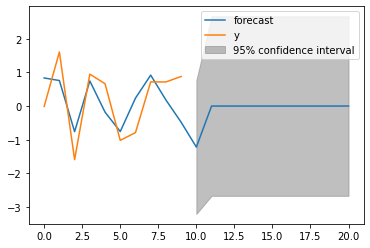

In [73]:
# Forecast the first MA(1) model
mod = ARMA(simulated_data_1, order=(0,1))
res = mod.fit()
res.plot_predict(start=990, end=1010)
plt.show()

- **Conclusion** : Notice that the out-of-sample forecasts are flat into the future after the first data point.

### High Frequency Stock Prices
- Higher frequency stock data is well modeled by an MA(1) process.
- The DataFrame intraday contains one day's prices (on September 1, 2017) for Sprint stock (ticker symbol "S") sampled at a frequency of one minute. The stock market is open for 6.5 hours (390 minutes), from 9:30am to 4:00pm.
- When we look at the first few rows , we'll notice several things. First, there are no column headers.The data is not time stamped from 9:30 to 4:00, but rather goes from 0 to 390. And we will notice that the first date is the odd-looking "a1504272600". The number after the "a" is Unix time which is the number of seconds since January 1, 1970. This is how this dataset separates each day of intraday data.
- DATE column is an object, which here means a string. We will need to change that to numeric before we can clean up some missing data.

In [96]:
intraday_data = pd.read_csv('./data/fin_data/Sprint_Intraday.txt', names=['0','1','2','3','4','5'])
intraday_data.head(3)

,0,1,2,3,4,5
0,a1504272600,8.29,8.30,8.29,8.30,32407
1,1,8.27,8.30,8.25,8.29,28467
2,2,8.28,8.28,8.28,8.28,1500


In [97]:
intraday = intraday_data.iloc[:,:2]
intraday.head(3)

,0,1
0,a1504272600,8.29
1,1,8.27
2,2,8.28


In [98]:
# import datetime module
import datetime

# Change the first date to zero
intraday.iloc[0,0] = 0

# Change the column headers to 'DATE' and 'CLOSE'
intraday.columns = ['DATE','CLOSE']

# Examine the data types for each column
print(intraday.dtypes)

# Convert DATE column to numeric
intraday['DATE'] = pd.to_numeric(intraday['DATE'])

# Make the `DATE` column the new index
intraday = intraday.set_index('DATE')

DATE      object
CLOSE    float64
dtype: object


### More Data Cleaning: Missing Data


In [99]:
# Notice that some rows are missing
print("If there were no missing rows, there would be 391 rows of minute data")
print("The actual length of the DataFrame is:", len(intraday))

If there were no missing rows, there would be 391 rows of minute data
The actual length of the DataFrame is: 389


In [100]:
# Everything
set_everything = set(range(391))

# The intraday index as a set
set_intraday = set(intraday.index)

# Calculate the difference
set_missing = set_everything - set_intraday

# Print the difference
print("Missing rows: ", set_missing)

Missing rows:  {182, 14}


- Fill in the missing rows using the `.reindex()` method, setting the index equal to the full `range(391)` and forward filling the missing data by setting the method argument to `'ffill'`.
- Change the index to times using pandas function `date_range()`, starting with `'2017-09-01 9:30'` and ending with `'2017-09-01 16:00'` and passing the argument `freq='1min'`
- Missing data is common with high frequency financial time series

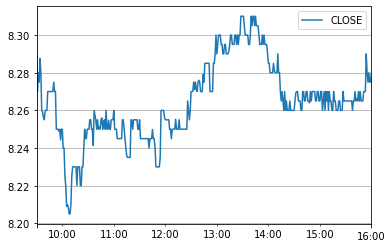

In [102]:
# Fill in the missing rows
intraday = intraday.reindex(range(391), method='ffill')

# Change the index to the intraday times
intraday.index = pd.date_range(start='2017-09-01 9:30', end='2017-09-01 16:00', freq='1min')

# Plot the intraday time series
intraday.plot(grid=True)
plt.show()

### Applying an MA Model
- The bouncing of the stock price between bid and ask induces a negative first order autocorrelation, but no autocorrelations at lags higher than 1. 
- We get the same ACF pattern with an MA(1) model. Therefore, we will fit an MA(1) model to the intraday stock data
- The first step is to compute minute-by-minute returns from the prices in intraday, and plot the autocorrelation function. We should observe that the ACF looks like that for an MA(1) process. Then, fit the data to an MA(1), the same way we did for simulated data.

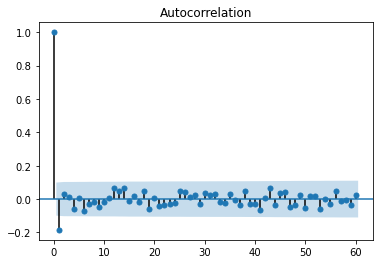

const         -0.000002
ma.L1.CLOSE   -0.179272
dtype: float64


In [103]:
# Compute returns from prices and drop the NaN
returns = intraday.pct_change()
returns = returns.dropna()

# Plot ACF of returns with lags up to 60 minutes
plot_acf(returns, lags=60)
plt.show()

# Fit the data to an MA(1) model
mod = ARMA(returns, order=(0,1))
res = mod.fit()
print(res.params)

- Notice the significant negative lag-1 autocorrelation, just like for an MA(1) model.

### Equivalence of AR(1) and MA(infinity)
- To better understand the relationship between MA models and AR models, we will demonstrate that an AR(1) model is equivalent to an MA(∞) model with the appropriate parameters.
- WE will simulate an MA model with parameters 0.8,0.82,0.83,… for a large number (30) lags and show that it has the same Autocorrelation Function as an AR(1) model with ϕ=0.8.

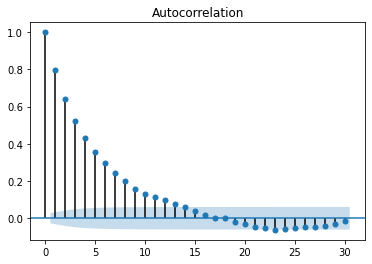

In [104]:
# Build a list MA parameters
ma = [0.8**i for i in range(30)]

# Simulate the MA(30) model
ar = np.array([1])
AR_object = ArmaProcess(ar, ma)
simulated_data = AR_object.generate_sample(nsample=5000)

# Plot the ACF
plot_acf(simulated_data, lags=30)
plt.show()

- Notice that the ACF looks the same as an AR(1) with parameter 0.8